
# Project: Investigate a Dataset (TMDb movie data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The movie dataset contains information about 10,000 movies, comes from IMDB, and through my view of the data, each film includes plentiful details on budget, revenue, popularity, etc.

In this project, I am going to answer the following questions.
#### Questions
1-What is the best month to release the movie?

2-What is the most profitable movie?

3-How does popularity affect the profit

4-What are the top casts and genres?





In [25]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [26]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [28]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


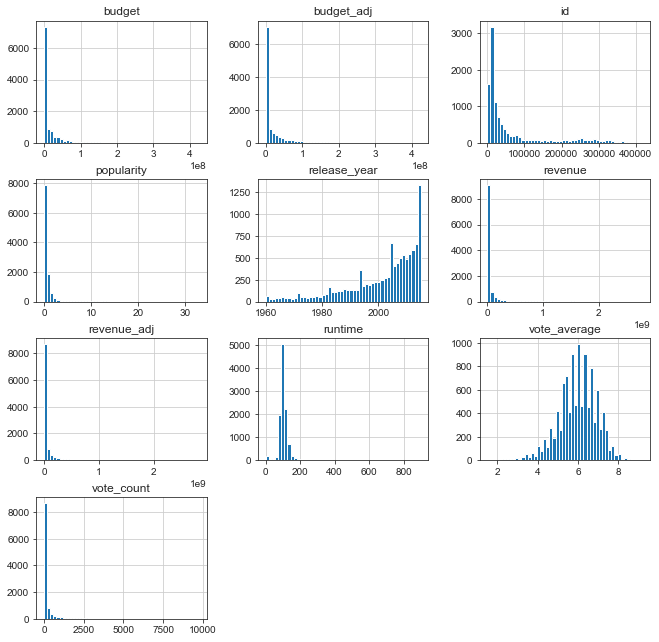

In [30]:
# Preview overall distribution of data from each properties
df.hist(figsize = (11,11), bins=50);


The histograms show there seem to be many 0 values and these values might need to be removed to get more accurate results

### Data Cleaning (Drop Unecessary Columns)

Remove columns that are not useful for answering my questions.

In [31]:
df.drop(['budget','revenue','homepage','tagline','keywords','overview'], axis=1, inplace=True)
              


In [32]:
df.head(1)

,id,imdb_id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [33]:
# Exploer dataset
df.describe()

,id,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Data Cleaning  ( Filling 0 Values )
we can see the data ( budget_adj, revenue_adj, and runtime ) 0 values, Fill them with the average of each column.

In [34]:
# getting average of budget_adj
print(df['budget_adj'].mean())


17551039.822886847


In [35]:
# replace the 0 values 
df['budget_adj'] = df['budget_adj'].replace(0, 17551039.822886847)

In [36]:
# getting average of budget_adj
print(df['runtime'].mean())


102.07086324314375


In [37]:
# replace the 0 values 
df['runtime'] = df['runtime'].replace(0, 102.07086324314375)

In [38]:
# getting average of revenue_adj
print(df['revenue_adj'].mean())

51364363.25325093


In [39]:
# replace the 0 values 
df['revenue_adj'] = df['revenue_adj'].replace(0, 51364363.25325093)

In [14]:
df.describe()

,id,popularity,runtime,vote_count,vote_average,budget_adj,revenue_adj
count,10866.000000,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,102.362065,217.389748,5.974922,2.675136e+07,7.980243e+07
std,92130.136561,1.000185,30.902781,575.619058,0.935142,3.050850e+07,1.365610e+08
min,5.000000,0.000065,2.000000,10.000000,1.500000,9.210911e-01,2.370705e+00
25%,10596.250000,0.207583,90.000000,17.000000,5.400000,1.755104e+07,5.136436e+07
50%,20669.000000,0.383856,99.000000,38.000000,6.000000,1.755104e+07,5.136436e+07
75%,75610.000000,0.713817,111.000000,145.750000,6.600000,2.085325e+07,5.136436e+07
max,417859.000000,32.985763,900.000000,9767.000000,9.200000,4.250000e+08,2.827124e+09


<a id='eda'></a>
### Data Cleaning  ( Cleaning duplicates )

>Looking for duplicates rows and remove them 


In [40]:
#lookimg for any duplicates
sum(df.duplicated())

1

In [116]:
#remove duplicates
df.drop_duplicates(inplace=True)

<a id='eda'></a>
### Changing DataTypes
> Changing columns to appropriate 


In [42]:
df['release_date'] = pd.to_datetime(df['release_date'])
df.dtypes

id                               int64
imdb_id                         object
popularity                     float64
original_title                  object
cast                            object
director                        object
runtime                        float64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
budget_adj                     float64
revenue_adj                    float64
dtype: object

<a id='eda'></a>
## Exploratory Data Analysis

>After trimmed and cleaned the data, it is ready to explore and create visualizations to address the research questions.

###  Question 1 : What is the best month to release the movie?

<a id='eda'></a>
 Now, looking for movies that have top revenues and see the (months) have the highest revenues.

In [43]:
# creating column ( month) and extract the month from release_data
df['month'] = df['release_date'].apply(lambda x: x.month)
df.head(3)


,id,imdb_id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,month
0,135397,tt0369610,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,6
1,76341,tt1392190,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,5
2,262500,tt2908446,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,3


In [44]:
# Group by month and sum the revenues
month_revenue = df.groupby('month')['revenue_adj'].sum()
month_revenue

month
1     4.910687e+10
2     4.235442e+10
3     6.385725e+10
4     5.487055e+10
5     8.423232e+10
6     1.021322e+11
7     7.987658e+10
8     5.757434e+10
9     6.804293e+10
10    7.424615e+10
11    8.171477e+10
12    1.091239e+11
Name: revenue_adj, dtype: float64

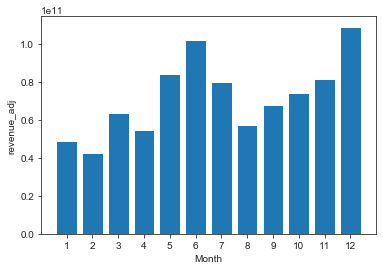

In [45]:
#creating a bar chart to see them 
sns.set_style('ticks')
plt.bar([1,2,3,4,5,6,7,8,9,10,11,12], month_revenue, tick_label = [1,2,3,4,5,6,7,8,9,10,11,12])
plt.ylabel('revenue_adj')
plt.xlabel('Month');

  We can see June and December are the highest
revenue for movie releases.
  Now I am going to check the number of movie releases each month to see if they're a few high earning movies.

In [46]:
df['month'].value_counts()


9     1331
10    1153
12     985
1      919
8      918
6      827
3      822
11     814
5      809
7      799
4      797
2      691
Name: month, dtype: int64

In [47]:
df['month'].value_counts().mean()

905.4166666666666

We can see that June and December are the highest revenue, and they are the best months to release movies in also the number of movie releases ranges from 691-1331, and the best two months are not far from the average number of 905.5.


### Question 2 : What is the most profitable movie?

I have to create a new column for the profit to see which movie is more successful and after that, sorting the data by profit and show the top 5.

In [51]:
#Create new colums for profit 
df['profit'] = df['revenue_adj'] - df['budget_adj']
df['revenue_adj'] = df['revenue_adj'].astype(int)
df.head(1)


,id,imdb_id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,month,profit
0,135397,tt0369610,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1392445892,6,1.254446e+09


In [52]:
#Sorting data by profit and show the top 5
df.sort_values(['profit'], ascending = False).head(5)

,id,imdb_id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,month,profit
1329,11,tt0076759,12.037933,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,George Lucas,121.0,Adventure|Action|Science Fiction,Lucasfilm|Twentieth Century Fox Film Corporation,1977-03-20,4428,7.9,1977,3.957559e+07,2789712242,3,2.750137e+09
1386,19995,tt0499549,9.432768,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,162.0,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,2009-12-10,8458,7.1,2009,2.408869e+08,2827123750,12,2.586237e+09
5231,597,tt0120338,4.355219,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,194.0,Drama|Romance|Thriller,Paramount Pictures|Twentieth Century Fox Film ...,1997-11-18,4654,7.3,1997,2.716921e+08,2506405735,11,2.234714e+09
10594,9552,tt0070047,2.010733,The Exorcist,Linda Blair|Max von Sydow|Ellen Burstyn|Jason ...,William Friedkin,122.0,Drama|Horror|Thriller,Warner Bros.|Hoya Productions,1973-12-26,1113,7.2,1973,3.928928e+07,2167324901,12,2.128036e+09
9806,578,tt0073195,2.563191,Jaws,Roy Scheider|Robert Shaw|Richard Dreyfuss|Lorr...,Steven Spielberg,124.0,Horror|Thriller|Adventure,Universal Pictures|Zanuck/Brown Productions,1975-06-18,1415,7.3,1975,2.836275e+07,1907005841,6,1.878643e+09


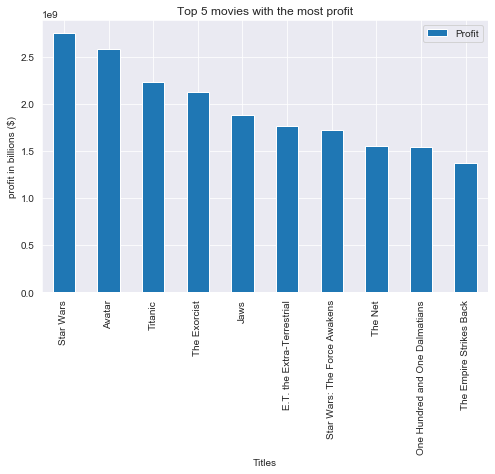

In [63]:

# First sort the raw data by the profit.
sorted_profit = df['profit'].sort_values(ascending=False)[:10]

# Create title and profit lists which will be used as X-axis and Y-axis values in bar graph.
high_profit=pd.DataFrame()
titles=[]
profit=[]

# Fill the vallues from raw data to the lists.
for i in sorted_profit.index:
    titles.append(df.loc[i,'original_title'])
    profit.append(sorted_profit.loc[i])
high_profit['Titles']=titles
high_profit['Profit']=profit
high_profit.set_index('Titles',inplace=True)

# Plot
high_profit.plot(kind ='bar',figsize=(8,5))
plt.title('Top 5 movies with the most profit');
plt.ylabel('profit in billions ($)');
sns.set_style('darkgrid')

Now we can see the top 5 of the most earned profit above, and the Star Wars is at tops 1   

### Question 3 : How does popularity affect the profit?

> I am going to create a scatter plot to see the relationship between popularity and profit.  

0.5322100929527184

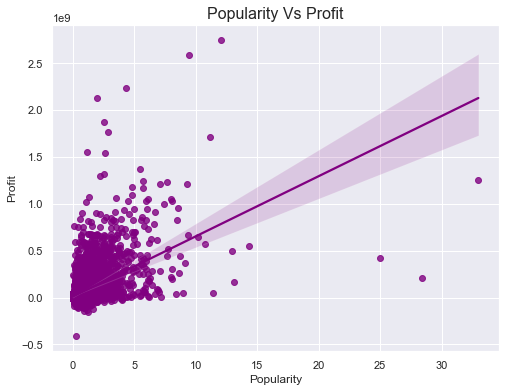

In [73]:
# Create a scatter plot to study relationship between popularity and porfit.

ax = sns.regplot(x=df['popularity'],y=df['profit'],color='purple')

#setup the title and the labels of the scatter plot.
ax.set_title("Popularity Vs Profit",fontsize=16)
ax.set_xlabel("Popularity",fontsize=12)
ax.set_ylabel("Profit",fontsize=12)

#setup the figure size.
sns.set(rc={'figure.figsize':(8,6)})


def correlation_coeff(x,y):
    std_x=(x-x.mean())/x.std(ddof=0)
    std_y=(y-y.mean())/y.std(ddof=0)
    return(std_x*std_y).mean()

correlation_coeff(df['popularity'],df['profit'])

We can see from above that there is a positive relationship between them, and the trend line is upward.
but I think the movies with high budget and low profit or other similar situations make lower correlation coefficient value is less desirable

### Question 4:  What are the top casts and genres?
> to get the top of casts and genres, we need to separate each all people in each movie into every individual.

In [78]:
# separate each all people in each movie into every individuals.
df.loc[:,['original_title', 'cast', 'genres']].head()

,original_title,cast,genres
0,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Action|Adventure|Science Fiction|Thriller
1,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,Action|Adventure|Science Fiction|Thriller
2,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Adventure|Science Fiction|Thriller
3,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,Action|Adventure|Science Fiction|Fantasy
4,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,Action|Crime|Thriller


In [79]:
def extract_data(column_name):
    df['cast']=df['cast'].astype(str)
   
    # From the column entered, eparate the string by '|'
    all_data = df[column_name].str.cat(sep = '|')
    
    # StorE the values separately as series
    all_data = pd.Series(all_data.split('|'))
    
    # Read the descending order, starts with highest number
    count = all_data.value_counts(ascending = False)
    
    return count

In [80]:
# getting the casts.

cast_count = extract_data('cast')
cast_count = pd.DataFrame(data=cast_count)

top_cast = cast_count.head(10)
top_cast

,0
nan,75
Robert De Niro,72
Samuel L. Jackson,71
Bruce Willis,62
Nicolas Cage,61
Michael Caine,53
Robin Williams,51
John Cusack,50
Morgan Freeman,49
John Goodman,49


In [77]:
# getting the genres.

genres_count = extract_data('genres')
genres_count = pd.DataFrame(data=genres_count)

top_genres = genres_count.head(10)
top_genres

,0
Drama,4760
Comedy,3793
Thriller,2907
Action,2384
Romance,1712
Horror,1637
Adventure,1471
Crime,1354
Family,1231
Science Fiction,1229


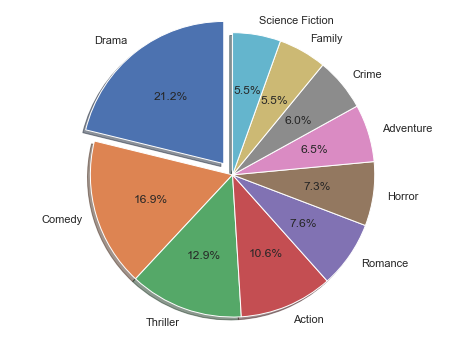

In [117]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Drama', 'Comedy', 'Thriller', 'Action','Romance','Horror', 'Adventure', 'Crime','Family', 'Science Fiction'
sizes = [4760, 3793, 2907, 2384, 1712, 1637, 1471, 1354, 1231, 1229]
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()




Now, we can see the Robert De Niro is the best actor, and Drama is the best genre.

<a id='conclusions'></a>
## Conclusions

Throughout The TMDb movie dataset, there is much information and contains information about 10,000 movies, but after Data Wrangling, the data provide more accurate results. Also, I removed columns that are not useful and cleaning duplicates, changing columns to appropriate, even the Line plot, bar chart, and histogram used to help visualize and answer questions, and I have come to several conclusions.

-    June and December are the highest revenue, and they are the best months to release movies in.
-    The profits have a positive relationship with budget and popularity
-    The Star Wars movie is at tops 1
-    Robert De Niro is the best actor 
-    Drama is the best genre

Although there are many information removed, such as rows contained 0 value and null values and  The dataset cut by a few thousand rows of movies, which would affect the result. 

### Resources

- github project
- matplotlib https://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/pie_features.html
- Stack Overflow 